# The Spark Foundation-GRIP AUGUST 2021

### Data Science and Business Analytics Intern
### Task 2: Prediction using Unsupervised ML

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
# load dataset

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
# get information of data like total rows, columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Actual Data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


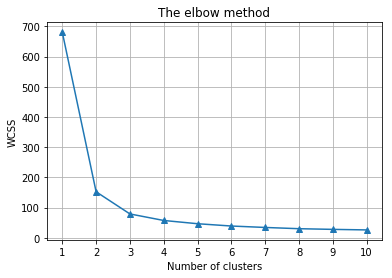

In [5]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='^')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.xticks(range(1,11))
plt.grid()
plt.show()

The <b>Elbow method</b> is used to determine the optimal number of clusters(k) into which the data may be clustered.

To determine the optimal number of clusters, we have to select the value of <b>k</b> at the <b>elbow</b> ie the point after which the <b>inertia</b> start decreasing in a linear fashion.

Thus for the given data, we conclude that the optimal number of clusters for the data is <b>3</b>.

<b>Inertia: It is the sum of squared distances of samples to their closest cluster center.</b>

In [6]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df)

### Plotting clusters - On the first two columns with their centroids

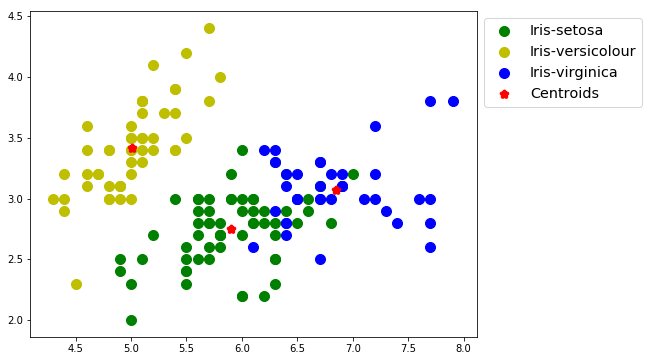

In [7]:
df_values = df.values
plt.figure(figsize=(8,6))
plt.scatter(df_values[y_kmeans==0,0], df_values[y_kmeans==0,1], s=100, label = 'Iris-setosa', color='g')
plt.scatter(df_values[y_kmeans==1,0], df_values[y_kmeans==1,1], s=100, label = 'Iris-versicolour', color='y')
plt.scatter(df_values[y_kmeans==2,0], df_values[y_kmeans==2,1], s=100, label = 'Iris-virginica', color='b')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label = 'Centroids', color='r', marker='*', linewidths=4)
plt.legend(bbox_to_anchor=(1,1), fontsize='x-large')
plt.show()